<center><img src="images/logo.png" alt="drawing" width="400" style="background-color:white; padding:1em;" /></center> <br/>

# ML through Application
## Module 2, Lab 1: Performing EDA for Categorical Variables

Exploratory data analysis (EDA) is an important process in ML. To learn about EDA, you will perform initial data investigations to discover patterns, spot anomalies, and look for insights to inform later ML modeling choices.

You will learn how to do the following:

- Understand and identify standard statistics that are used in ML.
- Create basic plots.
- Handle missing values.

----

__Austin Animal Center Dataset__

In this lab, you will work with historical pet adoption data in the [Austin Animal Center Shelter Intakes and Outcomes dataset](https://www.kaggle.com/datasets/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes?resource=download). The target field of the dataset (**Outcome Type**) is the outcome of adoption: 1 for adopted and 0 for not adopted. Multiple features are used in the dataset.

Dataset schema:
- __Pet ID:__ Unique ID of the pet
- __Outcome Type:__ State of pet at the time of recording the outcome (0 = not placed, 1 = placed). This is the field to predict.
- __Sex upon Outcome:__ Sex of pet at outcome
- __Name:__ Name of pet 
- __Found Location:__ Found location of pet before it entered the shelter
- __Intake Type:__ Circumstances that brought the pet to the shelter
- __Intake Condition:__ Health condition of the pet when it entered the shelter
- __Pet Type:__ Type of pet
- __Sex upon Intake:__ Sex of pet when it entered the shelter
- __Breed:__ Breed of pet 
- __Color:__ Color of pet 
- __Age upon Intake Days:__ Age (days) of pet when it entered the shelter
- __Age upon Outcome Days:__ Age (days) of pet at outcome

---

You will be presented with two kinds of exercises throughout the notebook: activities and challenges. <br/>

| <img style="float: center;" src="images/activity.png" alt="Activity" width="125"/>| <img style="float: center;" src="images/challenge.png" alt="Challenge" width="125"/>|
| --- | --- |
|<p style="text-align:center;">No coding is needed for an activity. You try to understand a concept, <br/>answer questions, or run a code cell.</p> |<p style="text-align:center;">Challenges are where you can practice your coding skills.</p>

## Index

- [Overall statistics](#Overall-statistics)
- [Basic plots](#Basic-plots)
- [Missing values](#Missing-values)

---
### Overall statistics

In this section, you will look at simple statistics of the dataset, with a focus on the categorical variables.

First, read the dataset into a DataFrame and look at the data.

In [1]:
%%capture
# Install libraries
!pip install -U -q -r requirements.txt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.impute import SimpleImputer

In [3]:
# Import the dataset
df = pd.read_csv("data/review_dataset.csv")

# Print the dataset shape (rows/columns)
print("The shape of the dataset is:", df.shape)

The shape of the dataset is: (95485, 13)


<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">In the following code cell, use the <code>df.head()</code> function to see the first 5 rows of the dataset.</p>
    <br>
</div>

In [10]:
############### CODE HERE ###############

df.head()

############## END OF CODE ##############

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days
0,A794011,1.0,Neutered Male,Chunk,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,730,730
1,A776359,1.0,Neutered Male,Gizmo,7201 Levander Loop in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,White/Brown,365,365
2,A674754,0.0,Intact Male,NaN,12034 Research in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,6,6
3,A689724,1.0,Neutered Male,*Donatello,2300 Waterway Bnd in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black,60,60
4,A680969,1.0,Neutered Male,*Zeus,4701 Staggerbrush Rd in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,White/Orange Tabby,7,60


<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>It's time to check your knowledge!</i></h3>
    <br>
    <p style=" text-align: center; margin: auto;">To load the question, run the following cell.</p>
    <br>
</div>

In [5]:
# Run this cell for a knowledge check question
from MLUMLA_EN_M2_Lab1_quiz_questions import *

question_1

The `head` function shows you the actual data, while the `df.info()` function gives basic statistics about the dataset. Some information includes the number of rows and the number of columns of the dataset.

In [6]:
# See the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95485 entries, 0 to 95484
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pet ID                 95485 non-null  object 
 1   Outcome Type           95485 non-null  float64
 2   Sex upon Outcome       95484 non-null  object 
 3   Name                   59138 non-null  object 
 4   Found Location         95485 non-null  object 
 5   Intake Type            95485 non-null  object 
 6   Intake Condition       95485 non-null  object 
 7   Pet Type               95485 non-null  object 
 8   Sex upon Intake        95484 non-null  object 
 9   Breed                  95485 non-null  object 
 10  Color                  95485 non-null  object 
 11  Age upon Intake Days   95485 non-null  int64  
 12  Age upon Outcome Days  95485 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 9.5+ MB


As you can see in the output, the dataset has 95485 rows and 13 columns.

Next, print the names of the columns (features) so that you can choose which features are categorical. This will also give you a reference of how the feature names are spelled so that you can call them correctly.

In [7]:
# List the features in the dataset
print(df.columns)

Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')


The categorical features are:
- Sex upon Outcome
- Found Location
- Intake Type
- Intake Condition
- Pet Type
- Sex upon Intake
- Breed
- Color

You will use only these eight features for the remainder of this lab.

In [11]:
# Make a list of the features that you want to use and
# set a variable that contains the name of the target feature
categorical_features = [
    "Sex upon Outcome",
    "Found Location",
    "Intake Type",
    "Intake Condition",
    "Pet Type",
    "Sex upon Intake",
    "Breed",
    "Color",
]

model_target = "Outcome Type"

---
### Basic plots

Now, you will examine the data with a bar plot to show counts of the categorical data fields. 

The `value_counts()` function shows the count of each unique value. This is useful for categorical variables.

__Note:__ These plots ignore null (missing) values. You will learn how to deal with missing values in the next section.

To get started, look at the distribution of the model target. 

In [12]:
df[model_target].value_counts()

Outcome Type
1.0    53854
0.0    41631
Name: count, dtype: int64

In [14]:
df["Sex upon Intake"].value_counts()

Sex upon Intake
Intact Male      33369
Intact Female    32515
Neutered Male    10521
Unknown           9725
Spayed Female     9354
Name: count, dtype: int64

From this output, you can tell that the majority of the Outcome Type is 1 (the animal was adopted). However, numbers are not easy to quickly understand, so create a plot of this data.

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/activity.png" alt="Activity" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">To use <code>plot.bar()</code> with the <code>value_counts()</code> function to make a bar plot of the values, run the following cell.</p>
    <br>
</div>

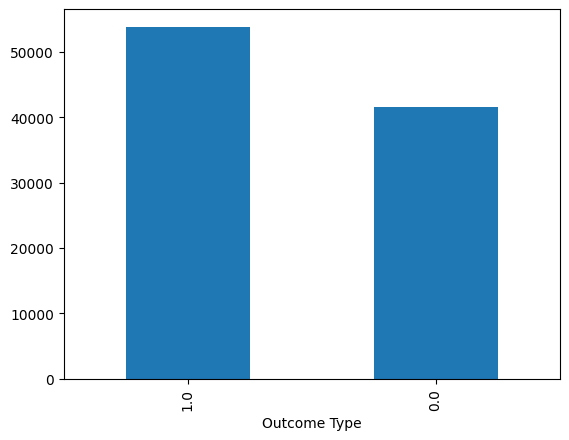

In [15]:
# Create a bar plot for the model_target feature
df[model_target].value_counts().plot.bar()
plt.show()

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>It's time to check your knowledge!</i></h3>
    <br>
    <p style=" text-align: center; margin: auto;">To load the question, run the following cell.</p>
    <br>
</div>

In [16]:
# Run this cell for a knowledge check question
question_2

Now that you have created a plot for a specific feature, you will explore the number of unique values for each of the categorical features.

In [17]:
# Loop through each feature and print the value count for each
for c in categorical_features:
    print(df[c].value_counts())

Sex upon Outcome
Neutered Male    30244
Spayed Female    28145
Intact Female    13724
Intact Male      13646
Unknown           9725
Name: count, dtype: int64
Found Location
Austin (TX)                                  14833
Travis (TX)                                   1402
7201 Levander Loop in Austin (TX)              644
Outside Jurisdiction                           607
Del Valle (TX)                                 426
                                             ...  
Cherry Creek On  Brodie Ln in Austin (TX)        1
Cameron Rd At Parmer Ln in Austin (TX)           1
303 W. Mlk in Austin (TX)                        1
131 Totvia  Drive in Bastrop (TX)                1
1311 Hyman in Austin (TX)                        1
Name: count, Length: 43951, dtype: int64
Intake Type
Stray                 70203
Owner Surrender       15146
Public Assist          5236
Wildlife               4554
Euthanasia Request      235
Abandoned               111
Name: count, dtype: int64
Intake Condition
No

The output contains a lot of information. Again, statistics are great to see numerically, but they are easier to interpret as graphs. To interpret the information more easily, you will create bar plot visualizations for each feature. 

For simplicity and speed, the following code cell will only show bar plots for features with *fewer than* 50 unique values.

Sex upon Outcome


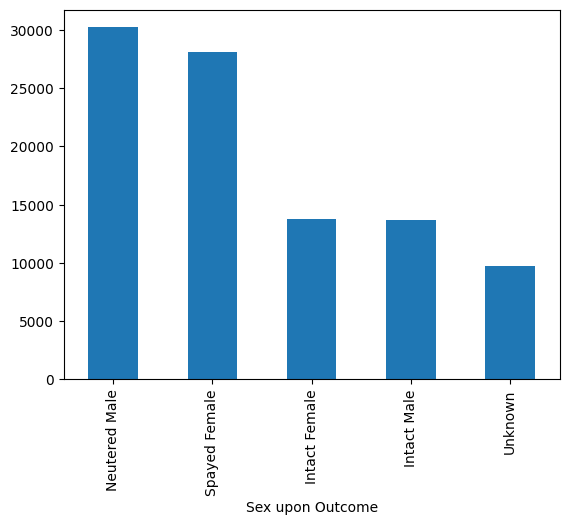

Intake Type


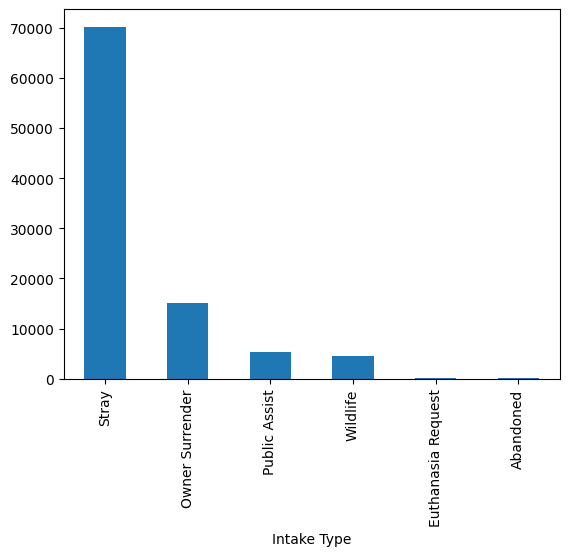

Intake Condition


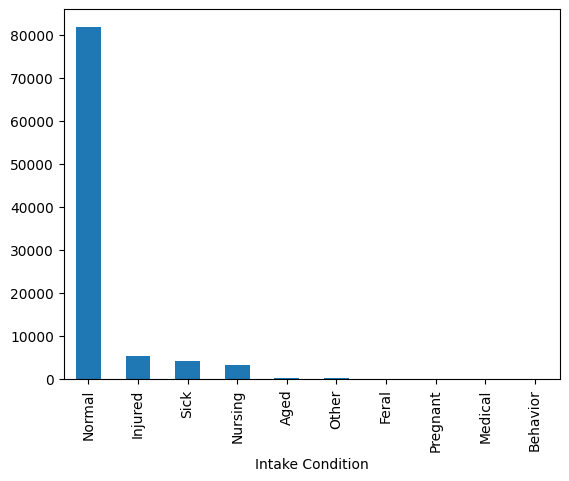

Pet Type


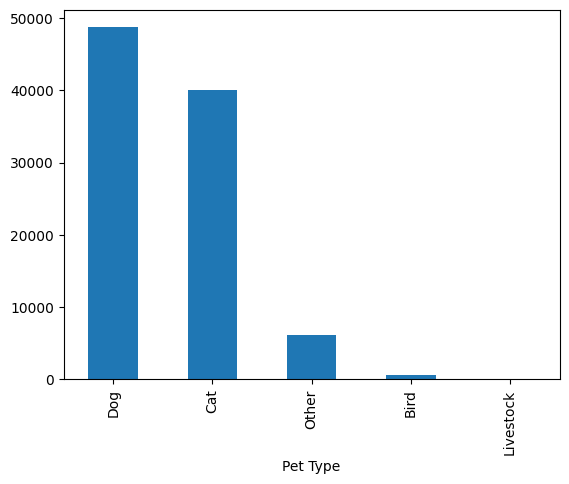

Sex upon Intake


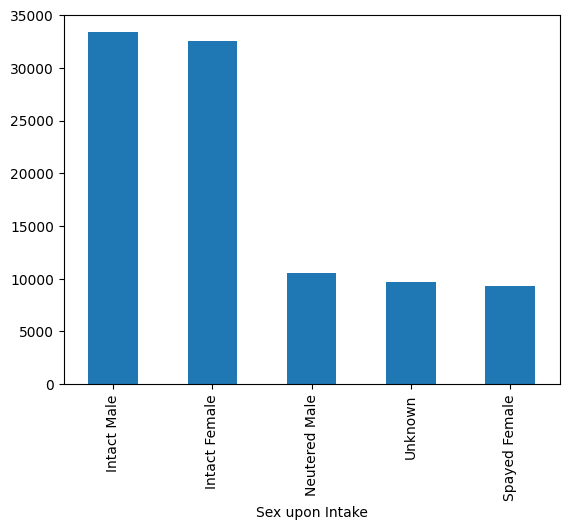

In [22]:
# Loop through each categorical feature
for c in categorical_features:
    # Check that the feature has fewer than 50 unique values
    if len(df[c].value_counts()) < 50:
        # Print the name of the feature
        print(c)
        # Create a bar plot of the feature
        df[c].value_counts().plot.bar()
        plt.show()

---
### Missing values

It is important to correct missing values in a dataset. In this section, you will see multiple ways to fix missing values for categorical variables.

First, check the number of missing (`nan`) values for each column.

__Note:__ This dataset is not missing many values for categorical features, but it's important to learn how to handle missing values.

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">In the following code cell, for each categorical feature, use the <code>isna().sum()</code> function to find the number of missing values for the feature.</p><br>
    <p style=" text-align: center; margin: auto;"><b>Hint:</b> First, select the categorical columns with <code>df[categorical_features]</code>, and then use <code>isna().sum()</code>.</p>
    <br>
</div>

In [18]:
############### CODE HERE ###############

df[categorical_features].isna().sum()

############## END OF CODE ##############

Sex upon Outcome    1
Found Location      0
Intake Type         0
Intake Condition    0
Pet Type            0
Sex upon Intake     1
Breed               0
Color               0
dtype: int64

In [19]:
df["Name"].isna().sum()

36347

In [20]:
df.isna().sum()

Pet ID                       0
Outcome Type                 0
Sex upon Outcome             1
Name                     36347
Found Location               0
Intake Type                  0
Intake Condition             0
Pet Type                     0
Sex upon Intake              1
Breed                        0
Color                        0
Age upon Intake Days         0
Age upon Outcome Days        0
dtype: int64

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>It's time to check your knowledge!</i></h3>
    <br>
    <p style=" text-align: center; margin: auto;">To load the question, run the following cell.</p>
    <br>
</div>

In [21]:
# Run this cell for a knowledge check question
question_3

Now that you have identified the features with missing values, you need to determine how to fix them.

First, create a list with the feature names in it.

In [23]:
columns_to_impute = ["Sex upon Outcome", "Sex upon Intake"]

Next, you need to decide how to handle the missing values.

#### Drop rows with missing values

One option is to drop the rows with missing values. For example, drop rows that have at least one missing value.

__Note:__ Other drop options are available, and what you choose will depend on your specific problem.

In [24]:
# Print the count of rows for each feature with missing values BEFORE you drop the rows
df[categorical_features].isna().sum()

Sex upon Outcome    1
Found Location      0
Intake Type         0
Intake Condition    0
Pet Type            0
Sex upon Intake     1
Breed               0
Color               0
dtype: int64

In [25]:
# Drop the rows with missing values
df_missing_dropped = df[categorical_features].dropna()

In [26]:
# Print the count of rows for each feature with missing values AFTER you drop the rows
df_missing_dropped.isna().sum()

Sex upon Outcome    0
Found Location      0
Intake Type         0
Intake Condition    0
Pet Type            0
Sex upon Intake     0
Breed               0
Color               0
dtype: int64

After you dropped the rows with missing values, you can see that the data has been cleaned. When only a few rows are missing values, this can be a useful option. Can you think of times when this approach might not be the best method?

#### Impute (fill in) missing values with .fillna() 

Instead of dropping rows or features, another option is to fill in the missing values with new values. This is known as *imputation* of missing values.

In [27]:
# Impute categorical features by using the statistical mode per feature to replace the missing values

# Assign the df to a new df
df_imputed_c = df.copy()
print("Before imputer:")
print(df_imputed_c[columns_to_impute].isna().sum())
for c in columns_to_impute:
    # Find the mode for each feature
    mode_impute = df_imputed_c[c].mode()[0]
    # Impute the categorical features with the mode
    # "inplace=True" parameter replaces missing values in place (no need for left handside assignment, like the example below)
    # df_another_pandas_dataset = df_imputed_c[c].fillna()
    df_imputed_c[c].fillna(mode_impute, inplace=True)
print("\nAfter imputer:")
print(df_imputed_c[columns_to_impute].isna().sum())

Before imputer:
Sex upon Outcome    1
Sex upon Intake     1
dtype: int64

After imputer:
Sex upon Outcome    0
Sex upon Intake     0
dtype: int64


In [30]:
df["Sex upon Outcome"].value_counts()

Sex upon Outcome
Neutered Male    30244
Spayed Female    28145
Intact Female    13724
Intact Male      13646
Unknown           9725
Name: count, dtype: int64

#### Impute (fill in) missing values with sklearn's SimpleImputer

A quick way to impute missing values is by using sklearn's SimpleImputer, a class that implements `.fit()` and `.transform()` methods. You can use this method in multiple ways.

One option is the `"most frequent"` strategy, where you replace the missing values with the most common values for that feature.

In [31]:
# Assign the df to a new df
df_sklearn_imputer = df.copy()
print("Before imputer:")
print(df_sklearn_imputer[columns_to_impute].isna().sum())

imputer = SimpleImputer(strategy="most_frequent")
df_sklearn_imputer[columns_to_impute] = imputer.fit_transform(
    df_sklearn_imputer[columns_to_impute]
)
print("\nAfter imputer:")
print(df_sklearn_imputer[columns_to_impute].isna().sum())

Before imputer:
Sex upon Outcome    1
Sex upon Intake     1
dtype: int64

After imputer:
Sex upon Outcome    0
Sex upon Intake     0
dtype: int64


Another option is to use the `"constant"` strategy, where you replace the missing values with a constant value for that feature. In the following example, you will use the word _Missing_ as the constant value.

In [32]:
# Assign the df to a new df
df_sklearn_imputer = df.copy()
print("Before imputer:")
print(df_sklearn_imputer[columns_to_impute].isna().sum())

imputer = SimpleImputer(strategy="constant", fill_value="Missing")
df_sklearn_imputer[columns_to_impute] = imputer.fit_transform(
    df_sklearn_imputer[columns_to_impute]
)
print("\nAfter imputer:")
print(df_sklearn_imputer[columns_to_impute].isna().sum())

Before imputer:
Sex upon Outcome    1
Sex upon Intake     1
dtype: int64

After imputer:
Sex upon Outcome    0
Sex upon Intake     0
dtype: int64


You will need to determine how to best handle missing values based on your dataset and what makes the best model.

----
## Conclusion

This notebook helped you to understand and manipulate the categorical features in a dataset so that you can create the best ML model. Understanding and preparing data is one of the most important steps to build a successful ML model.

## Next lab

In the next lab, you will learn about performing EDA on numerical features.